In [1]:

import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np
import math
 
img_img = skimage.io.imread(r'E:\comp\train\images\0064.tif')
img_label = skimage.io.imread(r'E:\comp\train\labels\0064.tif')
# skimage.io.imshow(img[:,:,1])
# plt.show()



In [20]:

var_dict = {}
for k in range(32):
    total = 0
    target1 = []
    for m in range(500):
        for n in range(500):
            total += img_img[m][n][k]
            if img_label[m][n] == 2:
                target1.append(img_img[m][n][k])
    avg = total/(500*500)
    var_ = 0
    for i in target1:
        var_ += (i-avg)**2
    var = var_ / len(target1)
    var_dict[k] = var

In [21]:
mean1 = avg


var_dict, mean1

({0: 2252.6116502157884,
  1: 6409.082539397838,
  2: 10073.509226125465,
  3: 8817.281292035674,
  4: 11119.429902311522,
  5: 16141.788600297079,
  6: 13138.629611688555,
  7: 14325.252727418976,
  8: 16691.608511404145,
  9: 19862.296612696464,
  10: 8186.690528538879,
  11: 9613.699247183624,
  12: 12672.02857614504,
  13: 13343.052807748605,
  14: 11077.61694258001,
  15: 10230.595001878897,
  16: 5016.668406350426,
  17: 2449.432358649588,
  18: 4217.01496241677,
  19: 1970.7608561373763,
  20: 4212.228395645688,
  21: 4250.329286515374,
  22: 3443.4397828388296,
  23: 2041.2124143784772,
  24: 1751.5345699855272,
  25: 2053.5365532677574,
  26: 1721.3906323739168,
  27: 2164.356056932074,
  28: 1437.288232109402,
  29: 647.671531449211,
  30: 524.9885594372066,
  31: 75.77255563528135},
 105.56174)

In [22]:
var_dict2 = {}
mean_dict2 = {}
for k in range(32):
    
    avg = img_img[:,:,k].mean()
    mean_dict2[k] = avg
    var = img_img[:,:,k].var()
    var_dict2[k] = var

In [19]:
mean2 = avg


var_dict2, mean2

({0: 472.03314052198397,
  1: 1307.6205770365439,
  2: 2173.4740044111363,
  3: 1956.585838104176,
  4: 2480.7063387803996,
  5: 3785.049031000001,
  6: 3217.056361954416,
  7: 3632.884678520944,
  8: 4841.850100305775,
  9: 6228.3181066398565,
  10: 2641.4609294064,
  11: 3159.4628262643037,
  12: 4204.660114039535,
  13: 4450.179588052976,
  14: 3909.9470808156007,
  15: 4212.807316122736,
  16: 2478.1786118778236,
  17: 3307.9959932973443,
  18: 8017.029180873663,
  19: 4138.187907189505,
  20: 9378.829100280253,
  21: 9439.017808190396,
  22: 7942.193676064703,
  23: 4799.988619548017,
  24: 4390.689461567937,
  25: 5317.702097528577,
  26: 4601.214615692401,
  27: 6118.233246346174,
  28: 4061.2228435070574,
  29: 1964.091069954496,
  30: 1573.1958706899038,
  31: 215.03103617240004},
 105.56174)

In [23]:
mean_dict2

{0: 491.346496,
 1: 571.462384,
 2: 543.978192,
 3: 452.990732,
 4: 474.60986,
 5: 547.855,
 6: 446.189172,
 7: 446.604084,
 8: 442.156332,
 9: 467.890012,
 10: 293.78044,
 11: 270.690236,
 12: 268.771908,
 13: 269.973468,
 14: 260.20438,
 15: 315.313292,
 16: 258.489224,
 17: 286.641784,
 18: 387.483656,
 19: 298.338864,
 20: 416.887912,
 21: 423.25564,
 22: 406.384536,
 23: 365.474772,
 24: 316.847992,
 25: 331.023632,
 26: 304.76274,
 27: 333.599768,
 28: 289.527212,
 29: 204.495752,
 30: 182.335436,
 31: 105.56174}

In [25]:
type(mean_dict2[0])

numpy.float64

In [54]:
p = np.zeros((32,32))

for i in range(32):
    for j in range(32):
        E_XY = (img_img[:,:,i] * img_img[:,:,j]).mean()
        p[i][j] = (E_XY - img_img[:,:,i].mean()*img_img[:,:,j].mean())/(math.sqrt(var_dict2[i]*var_dict2[j]))

In [59]:
group0 = np.arange(32)
group0.resize(8,4)
group0

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [43]:
group1 = np.arange(8)


In [63]:
R_w = []
for i in group0:
    m = 0
    for j in range(4):
        m += abs( p[i[0]][i[0+j]])
    R_w.append(m/4)

In [72]:
R_a = []
for i in range(32):
    n = 0
    for j in range(8):
        if i in group0[j]:
            m = j
            break
    for j in range(32):
        if j in group0[m]:
            continue
        else:
            n += abs(p[i][j])
    R_a.append(n/28)
            


In [76]:
P = []
for i in range(32):
    P.append(var_dict2[i]/(R_a[i]+R_w[i//4]))

In [77]:
P

[1.2098608099657246,
 3.5780749774881007,
 6.268917609813596,
 5.780073724802647,
 21.49106327319089,
 33.2198146528244,
 30.11990076340501,
 34.72380162486276,
 78.80543632917326,
 104.43109813686998,
 48.94507894926311,
 64.89051846383494,
 153.33875297255244,
 164.63990262354633,
 143.66324616462293,
 128.92430884641004,
 67.36711154185788,
 87.12952054481089,
 218.2526059355934,
 112.67023676165482,
 244.36405999342608,
 243.61526357342754,
 201.05584777751784,
 113.42091728355207,
 116.08657292163608,
 144.33800583962477,
 127.18534945478048,
 172.27746017935848,
 133.9546789478871,
 76.8001897341509,
 65.07747482541792,
 18.536978104620488]

In [89]:
count = 0
for i in range(32):
    if P[i]>150:
        print(i)
        count += 1
print("Count:",count)

12
13
18
20
21
22
27
Count: 7


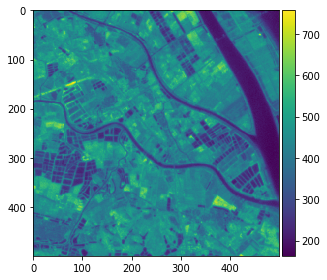

In [86]:
skimage.io.imshow(img_img[:,:,22])
plt.show()